# 1- Fourier series

## Intro

### settings

In [0]:
%reset -f

In [0]:
!git clone https://github.com/vincentvigon/assets_signal

remote: Compressing objects: 100% (182/182), done.
remote: Total 227 (delta 80), reused 188 (delta 41), pack-reused 0
Receiving objects: 100% (227/227), 13.15 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (80/80), done.
fatal: destination path 'assets_signal' already exists and is not an empty directory.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

### Summary

A Fourier series is the decomposition of a signal (=regular function) defined on a time-interval $[0,T]$ as an infinite sum of elementary waves. These waves can be either

* sinus/cosinus functions 
* only cosinus
* complex exponential functions


You have to distinguish:

* Fourier series: time is $[0,T]$
* Fourier transform: time is $\mathbb R$. Too theoric for our purpose. 
* Discrete Fourier transform: time is a finite set $\{0,1,...,N-1\}$. We will see this pratical case on the next chapter.


### Techincal words


After reading this chapter,  you might be familiar with all this terms (if not, re-read this chapter!)

* Fourier series
* Contiuous time/discrete time
* SinCos wave basis, exponential wave basis
* Period, frequency
* piecewise-smooth function
* dot product, hermitian product, orthogonality, orthonormality
* Gipps phenomenum, absolute convergence
* Hermitian symetry
* Spectrum, half-spectrum, amplitude-spectrum, fourier coefficient, coordinates
* signal approximation, signal filtration, signal compression
* Low-pass filters, high-pass filters, band-pass filters
* Perfect sampling
* Orthogonal polynomial, Legendre polynomial, gauss point
* Hilbert basis, Plancherel-Parseval identity, isometry
* Energy of a signal

## Signals

### Definition


 Continuous-time signals are defined on an time interval $[0,T]$. Most famous signals are sounds. Actualy sounds are produced by the variations of  the air pressure. 

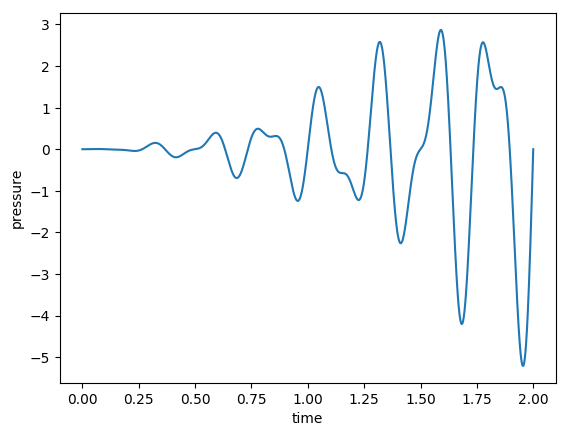

In [0]:
#time
t=np.linspace(0,2,2000)
#signal
signal0=(np.sin(4*2*np.pi*t)+0.5*np.sin(7*2*np.pi*t))*t**2

fig,ax=plt.subplots()
ax.plot(t,signal0)
ax.set_xlabel("time")
ax.set_ylabel("pressure");

### Periodic signal

A periodic function repeats itself after a while. 

***Definition:***

* A function $f$ as period $T>0$ when $f(t + T) = f(t)$ for all $t$. 
* **The** period of a function $f$ is the smallest $T>0$ such that $f$ is $T$-periodic
* The frequency of a periodic function is the number of complete cycles that can occur per second. So it is the inverse of the period. 

Remarks:

* a $T$-periodic function is also $nT$-periodic for $n=2,3,...$.
* One can say that a non-periodic has a period $0$ and a frequency $\infty$ but I prefer I prefer to say that it is a non-periodic function
* It is natural and usefull to say that the constant function has a frequency $0$. 
* The unit for frequency is the 'Hertz', abreviated by 'Hz'. Physicaly: Hz=$s^{-1}$. 


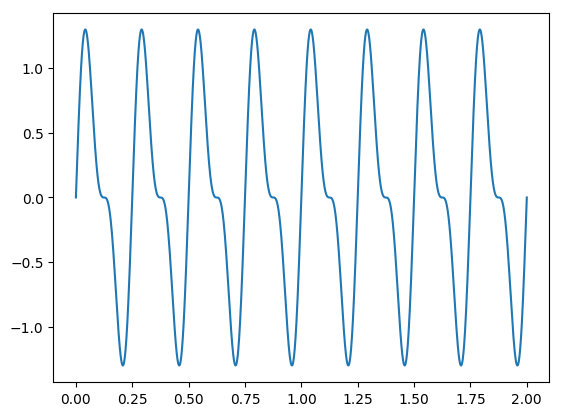

In [0]:
"A periodic signal (but only ploted on a bounded interval)"
signal1=np.sin(4*2*np.pi*t)+0.5*np.sin(8*2*np.pi*t)
fig,ax=plt.subplots()
ax.plot(t,signal1);

***To you:***  Give the period and the frequency of the following functions:

*  $(1\heartsuit)$ $t \to \sin(4*2\pi*t)$
* $(1\heartsuit)$ $t \to \sin(4*t)$
*  $(1\heartsuit)$ $t \to \sin(4*2\pi*t)+\sin(7*2\pi*t)$.  Plot this one, in such a way we see its periodicity. 
* $(1\heartsuit)$ $t \to \sin(4*2\pi*t)+\sin(7*t)$


## SinCos decomposition

During all this section, we will work on a the time-interval $[0,T]$ with $T=2$ seconds. A function defined on this interval can be either:

* a part of a periodic signal with period $T$ (so we implicitly prolongate it periodicaly), 
* or just a signal taken on a finite interval (ex: the  recording of a sound).



In [0]:
"""we define our time interval,
and its discretisation"""
T=2
nb_points=200
t=np.linspace(0,T,nb_points,endpoint=False)
"""the amount of time between two points """
step=T/nb_points

### Regularity of signals



***Definition:***  A function $f$ is *piecewise-smooth* (=lisse par morceaux) when $f$ and $f'$ are piecewise continuous. 

This is the regularity satisfied by all signals we meet in the nature. So from now: **the word 'signal' means 'piecewise-smooth function'**. 


Here is two additionnal regularities which can occurs or not:

* A Signal $f$ can be continuous (no jump).
* A Signal $f$ can be  continuous and satisfying $f(0)=f(T)$. 

***To you:*** What is the advantage of the condition $f(0)=f(T)$ when we want to prolongate $f$ periodicaly on $\mathbb R$?



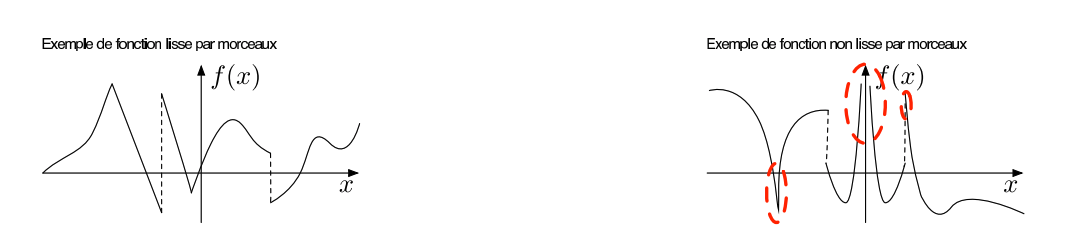

In [0]:
Image("assets_signal/lisseParMorceaux.png")

200


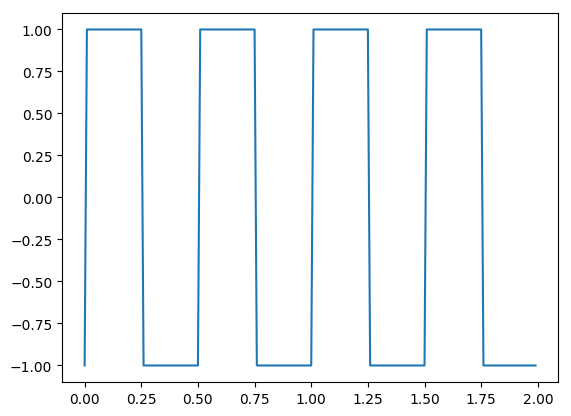

In [0]:
"""example of a non-continuous signal.
Jumps are the vertical lines"""
def square_signal(t):
    posi=(np.sin(4*np.pi*t)>0)
    f=np.empty(len(t))
    print(len(t))
    f[posi]=1
    f[~posi]=-1
    return f

plt.plot(t,square_signal(t));

***To you:*** $(1\heartsuit)$ Change the above drawing so that the vertical parts deseapear (more realistic for jumps). Help: it is very simple, just change the style!


***To you:*** 
* $(2\heartsuit)$ Add an argument to `square_signal()` which can rules the period. 
* $(3\heartsuit\flat)$  Create a function `triangle_signal()` that produce teeth of a saw. It is an example of a contiuous signal. 

### A dot product


For $f$ and $g$ signals on $[0,T]$, we define:
$$
 \mathtt{dot}(f,g) = \frac 2 T \int_0^T f(t) g(t) \, dt
$$

This is a dot-product (=produit scalaire), which means that satisfy the folloing properties:
* Symmetry: $\mathtt{dot}(f,g)=\mathtt{dot}(g,f)$
* Bi-linearity: $f\to \mathtt{dot}(f,g)$ and $g\to \mathtt{dot}(f,g)$ are linear. 
* Positive-define:
$$
\mathtt{dot}(f,f)\geq0 \qquad \text{and} \qquad   \mathtt{dot}(f,f)= 0\Leftrightarrow f=0
$$


***To you:*** $(2\heartsuit)$ Check  that these 3 properties are satisfied by $\mathtt{dot}()$. For the last one, you need to use the implicit regularity of signals $f$.



In [0]:
"""the informatic version of the scalar product. 
The integral is approximate by a sum"""
def dot(f,g):
    return 2*np.sum(f*g)/len(f) 
""" if we denote by 'step' the interval between two discretization points, we have
         2*np.sum(f*g)/len(f) = 2/T*np.sum(f*g)*step
""";

***To you:*** In the function above, the integral is approximate using the rectangle method. Do you know other methods $(1\heartsuit)$? Probably other methods are better, but please, do not change the above function. We have a good reason to use the rectangle method here (see later on).

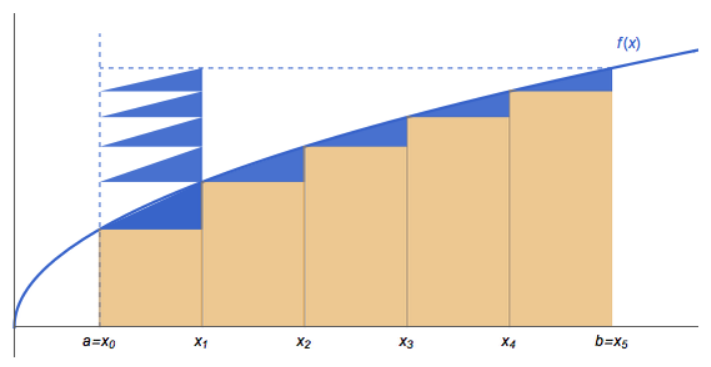

In [0]:
Image("assets_signal/rectangleMethod.png")

In [0]:
"let's test the dot product"
f=np.sin(t)
g=np.ones_like(t)
dot(f,g)

1.4115885481697072

***To you:*** $(1\heartsuit)$ The above numeric value is  an approcimation of ...

### sin-cos family


We define now some special functions on $[0,T]$:
\begin{align*}
\sin_n(t)& =\sin(2\pi \frac {nt} T),  \qquad \forall n\geq 1 \\
\cos_{n}(t) & =\cos(2\pi \frac {nt} T),  \qquad \forall n\geq 1
\end{align*}

We want to stack all this functions  in one family,  together with the constant function $t \to  \frac 1 {\sqrt 2}$. So we write:
\begin{align*}
sc_0(t)&= \frac 1 {\sqrt 2}\\
sc_{2i-1}(t)& =\sin_i(t),  \qquad \forall i\geq 1 \\
sc_{2i}(t) & =\cos_i(t),  \qquad \forall i\geq 1
\end{align*}


The infinite familly $(sc_n)_{n\in \mathbb N} $ is called the sinCos family. As we will check, it is an orthonormal family for our dot product. 


In [0]:
"""The begin of the sinCos family, stacked in a matrix. 
The n-th line is the discretization of sc_n(t)"""

def compute_sinCos_basis(t,T,M):
    """
    Args:
         t (1d-array) : time discretized
         T (int) : Duration 
         M (int) : number of different frequencies, so the size of the basis is 2N+1
    """

    basis_sc=np.empty([2*M+1,len(t)])
    basis_sc[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(1,M+1):    
        basis_sc[2*i-1,:]=np.sin(i*2*np.pi*t/T)
        basis_sc[2*i,:]=np.cos(i*2*np.pi*t/T)
        
    return basis_sc

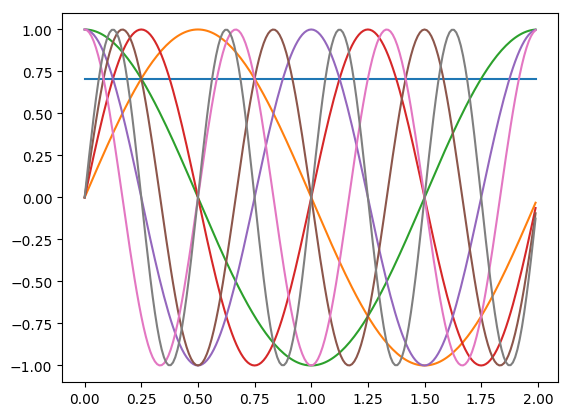

In [0]:
basis_sc=compute_sinCos_basis(t,T,10)
for i in range(8):
    plt.plot(t,basis_sc[i,:])

In [0]:
"""compute some dot-product to check the orthonormality"""
nb=10
many_dot_products=np.empty([nb,nb])

for i in range(nb):
    for j in range(nb):
        many_dot_products[i,j]=dot(basis_sc[i,:],basis_sc[j,:])

#print(basis_sc[:10,:]@basis_sc[:,:10])
#print(basis_sc@basis_sc.T)
print(many_dot_products)

[[ 1. -0. -0.  0. -0.  0. -0. -0. -0. -0.]
 [-0.  1. -0. -0.  0. -0.  0. -0. -0. -0.]
 [-0. -0.  1.  0. -0.  0. -0. -0.  0.  0.]
 [ 0. -0.  0.  1. -0. -0.  0. -0.  0. -0.]
 [-0.  0. -0. -0.  1. -0.  0.  0.  0. -0.]
 [ 0. -0.  0. -0. -0.  1.  0. -0. -0.  0.]
 [-0.  0. -0.  0.  0.  0.  1. -0.  0. -0.]
 [-0. -0. -0. -0.  0. -0. -0.  1. -0.  0.]
 [-0. -0.  0.  0.  0. -0.  0. -0.  1.  0.]
 [-0. -0.  0. -0. -0.  0. -0.  0.  0.  1.]]


***To you:*** $(2\heartsuit)$ The previous code is pedagogic but not efficient. Make it faster: suppress the function `dot` and suppress the double loop on `i` and `j` to recompute the matrix above.  Help: use the matrix-product `basis_sinCos@basis_sinCos.T`. You can also play to note all places where the code can be optimized in the following. 

### sin-cos approximation


A signal $f$ can be decompose as an infinite sum of elements of the sinCos family:
$$
f(t)=\sum_{n\in \mathtt N} a_n \, sc_n(t)
$$
where, from the orthonormality, the coordinates $a_n$ have a simple expression:
$$
a_n= \mathtt{dot}(f,sc_n)
$$

In particular, a signal can be approximate by a finite sum of elements of the sinCos family:
$$
f(t) \simeq\sum_{n=0}^{2M+1} a_n \, sc_n(t) 
$$

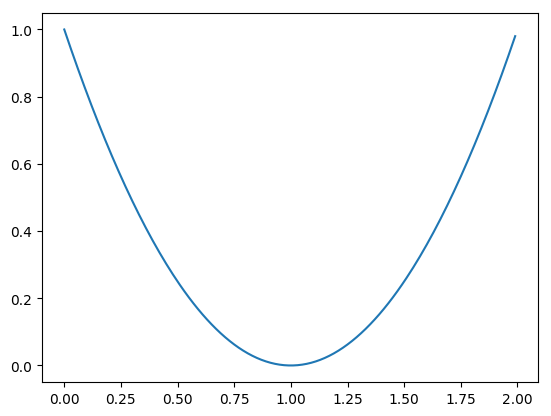

In [0]:
"""here is the function to decompose"""
f=(t-1)**2
plt.plot(t,f);

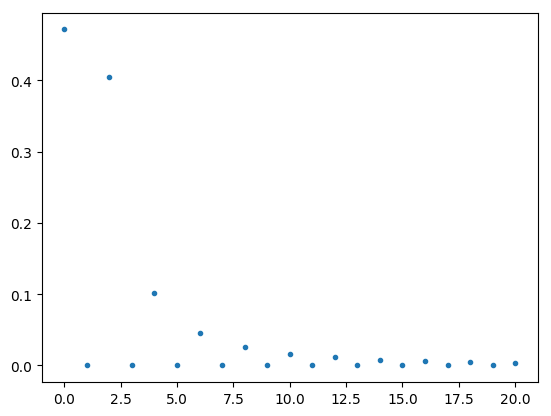

In [0]:
"""the coordinate of f in the sinCos family. 
Because of the orthonormality, this coordinate are very easy to compute"""
coordinates=np.empty(len(basis_sc))

for i in range(len(basis_sc)):
    coordinates[i]=dot(f,basis_sc[i,:])

plt.plot(range(len(basis_sc)),coordinates,".");

***To you:*** $(2\heartsuit)$ Explain the particularity of the plot above.

In [0]:
"""each line of the following matrix represent an approximation of the signal f """
approximations=np.empty([len(basis_sc),nb_points])
for i in range(len(basis_sc)):
    coor_troncated=coordinates.copy()
    coor_troncated[i:]=0
    approximations[i,:]=coor_troncated@basis_sc
    
approximations

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.333, 0.333, 0.333, ..., 0.333, 0.333, 0.333],
       [0.333, 0.333, 0.333, ..., 0.333, 0.333, 0.333],
       ...,
       [0.953, 0.951, 0.946, ..., 0.938, 0.946, 0.951],
       [0.958, 0.956, 0.951, ..., 0.942, 0.951, 0.956],
       [0.958, 0.956, 0.951, ..., 0.942, 0.951, 0.956]])

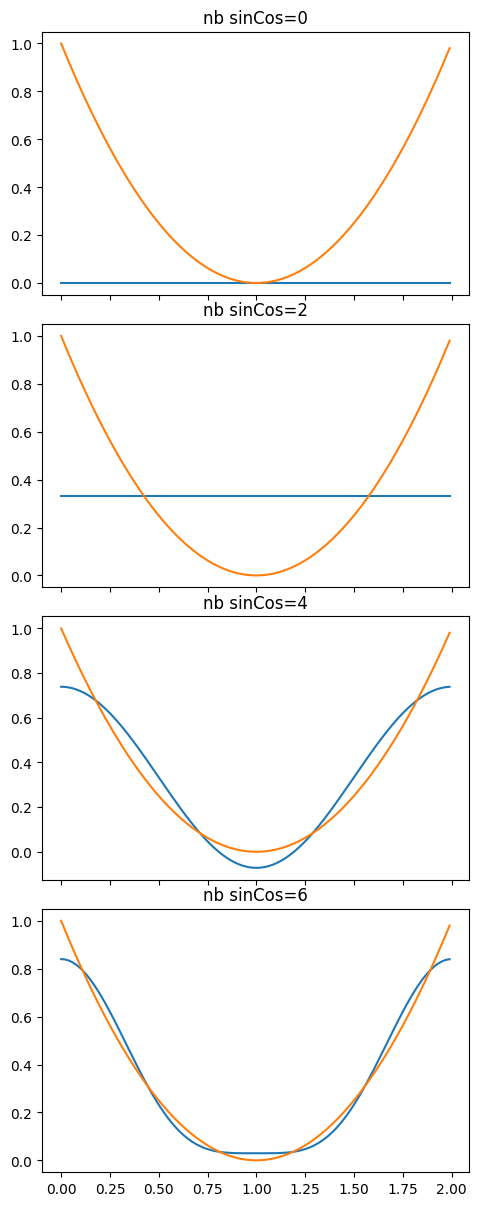

In [0]:
"""let's plot some of the approximations"""
nb_plots=4
fig,axs=plt.subplots(nb_plots,figsize=(5,nb_plots*3),sharex=True)
fig.tight_layout()

for i in range(nb_plots):
    axs[i].plot(t,approximations[2*i,:])
    axs[i].plot(t,f)
    axs[i].set_title("nb sinCos="+str(2*i))

***To you:*** $(1\heartsuit)$ Why did we only plot the approximations made with an even number of sinCos?


***To you:***  Make the error plot, that illustrate how the error between the function `f` and its approximations decrease. To compute the error use:

* $(2\heartsuit)$ the $L_2$ norm with the help of `dot()`
* $(2\heartsuit)$ the $L_\infty$ norm  with the help of `np.max()`

## Gipps and theory $\hookleftarrow$

 ### Make general code

We wrap all the previous code into a class, that we will use several times in the sequel. The purpose is also to show you how objets allow to well organize your code. 

In [0]:
class Decomposer:
    
    def __init__(self,t,basis,dot,f):
        
        self.t=t
        self.basis=basis
        self.f=f
        self.dot=dot
        
        
        self.OUT_coordinates=None
        self.OUT_approximations=None
        
        
        self.dtype=np.float64
  
       
        
    def check_ortho(self,nb=None):
        
        if nb==None: nb=len(self.basis)
            
        many_dot_products=np.empty([nb,nb],dtype=self.dtype)
        for i in range(nb):
            for j in range(nb):
                many_dot_products[i,j]=self.dot(self.basis[i,:],self.basis[j,:])

        print(many_dot_products)
        
        
        
    
    def compute_coordinates(self,plotThem=False):
    
        self.OUT_coordinates=np.empty(len(self.basis),dtype=self.dtype)

        for i in range(len(self.basis)):
            self.OUT_coordinates[i]=self.dot(self.f,self.basis[i,:])

        if plotThem:
            plt.plot(range(len(self.basis)),coordinates,".")
            
        return self.OUT_coordinates
    
    
        
    
    def compute_approximations(self,approx_indexes,plotThem=False):        
        
        assert max(approx_indexes)<=len(self.basis), "approximation index can not be greater than the size of the basis"
        
        if self.OUT_coordinates is None: 
            self.OUT_coordinates=self.compute_coordinates()
        
        
        """each line of the folowing matrix represent an approximation f_N of the signal f """
        self.OUT_approximations=np.empty([len(approx_indexes),len(self.t)],dtype=self.dtype)
        
        for i,j in enumerate(approx_indexes):
            coor_troncated=self.OUT_coordinates.copy()
            coor_troncated[j:]=0
            self.OUT_approximations[i,:]=coor_troncated@self.basis

            
        if plotThem:
            nb=len(approx_indexes)
            if nb<=1: nb=2 # to avoid a bug when we write axs[i]
            fig,axs=plt.subplots(nb,1,figsize=(8,nb*2))
            
            
            for i in range(len(approx_indexes)):
                axs[i].plot(self.t,self.f)
                axs[i].plot(self.t,self.OUT_approximations[i,:])
                axs[i].set_title("sum of "+str(approx_indexes[i])+" terms")
                
            fig.tight_layout()
         
       
        return self.OUT_approximations

        
    
         

***To you:*** 

* $(1\heartsuit)$ Why the previous class can not be replaced by a simple function?
* $(1\heartsuit)$ What trick did we use to avoid useless computations when the user call some of the methods of the `Decomposer`
*  $(2\heartsuit)$ In the `__init__` method above, add an `assert`, that check the compatibiliy between the 3 args `t,basis,f`. 

In [0]:
T=2
t=np.linspace(0,T,2000,endpoint=False)
f=(t-1)**2
basis_sc_small=compute_sinCos_basis(t,T,3)

decomposer=Decomposer(t,basis_sc_small,dot,f)

In [0]:
decomposer.check_ortho()

[[ 1.  0. -0. -0.  0.  0. -0.]
 [ 0.  1. -0.  0.  0.  0.  0.]
 [-0. -0.  1.  0. -0.  0. -0.]
 [-0.  0.  0.  1. -0.  0. -0.]
 [ 0.  0. -0. -0.  1.  0. -0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [-0.  0. -0. -0. -0.  0.  1.]]


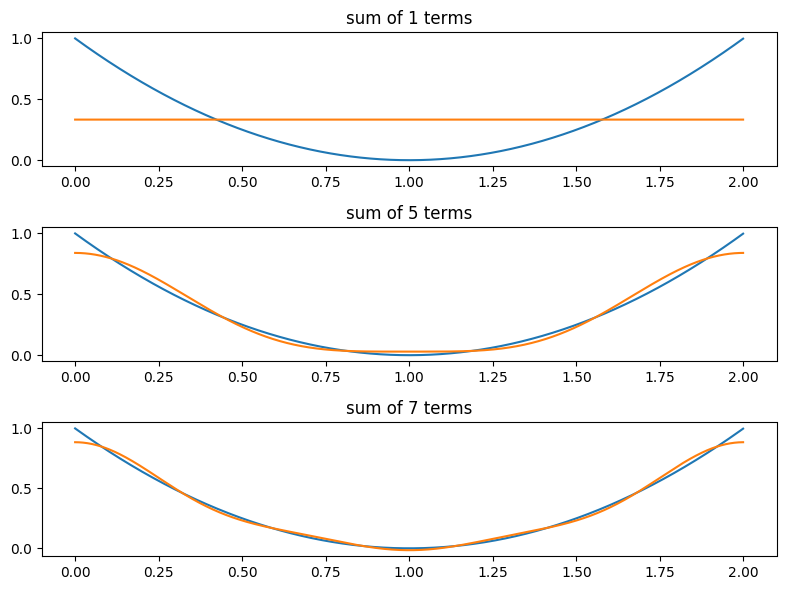

In [0]:
decomposer.compute_approximations([1,5,7],True);

***To you:*** $(1\heartsuit)$ Make work the whole pipeline, with the function to approximate $f(t)=t^2$. Note how approximations becomes bad. The explanation comes in the next section.  

***To you:*** $(3\heartsuit)$ Add a method `compute_L2_error()` and `compute_Loo_error()`,  which allow to incorporate your previous work into the `Decomposer`. 

### Gipps phenomenum




2000


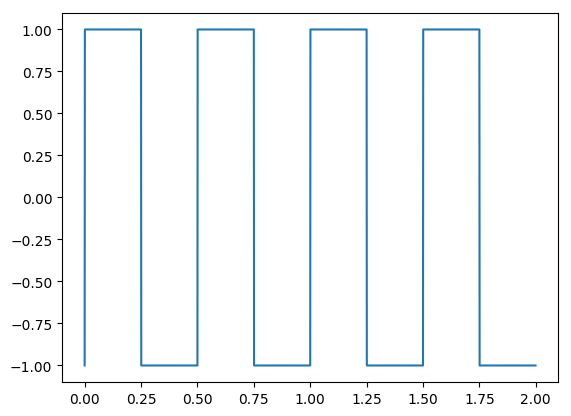

In [0]:
f_discont=square_signal(t)
plt.plot(t,f_discont);

In [0]:
basis_sc_big=compute_sinCos_basis(t,T,100)
basis_sc_big.shape

(201, 2000)

In [0]:
decomposer=Decomposer(t,basis_sc_big,dot,f_discont)

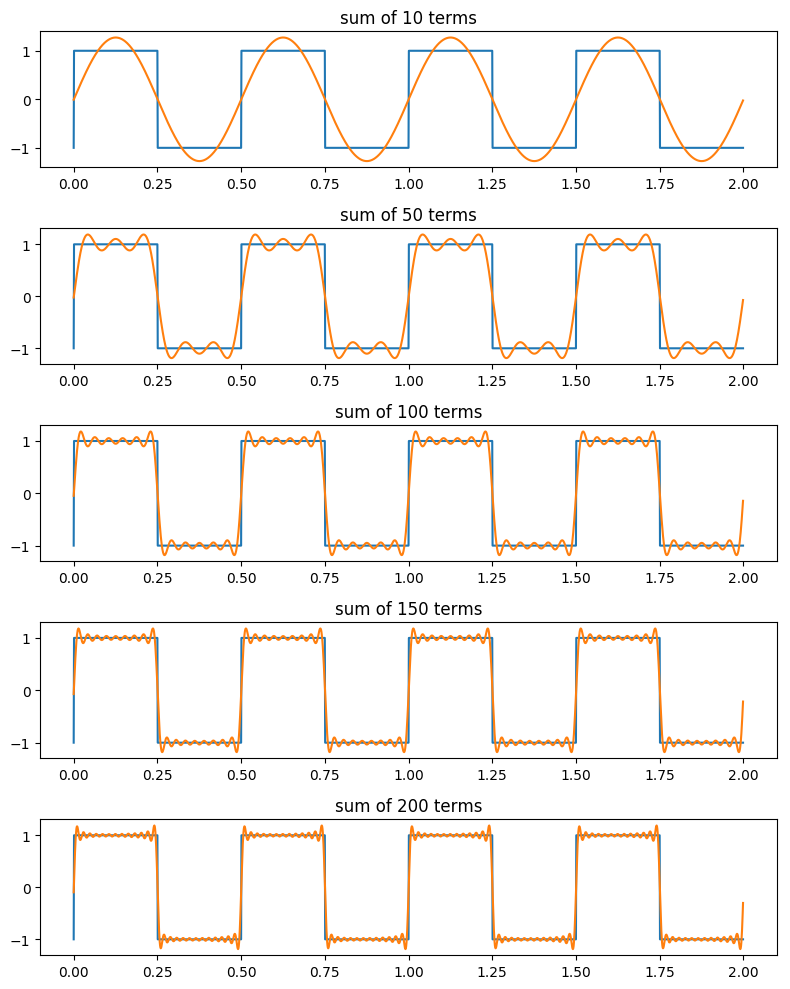

In [0]:
decomposer.compute_approximations([10,50,100,150,200],True);

***To you:*** $(2\heartsuit)$ Show with curves than the above approximations converge or not converge according to the norm we consider. You can use for this the `Decomposer` that you have modified. 


***To you:*** $(1\heartsuit)$ So: discontinuities implies bad approximations. But does the function $t\to t^2$ you tried before is discontinuous? 

### Summary in one theorem

The next theorem summarize all that we have seen:

***The 3 points theorem, sinCos version:***

* The familly $(sc_n)$ is orthonormal for  $\mathtt{dot}()$
* Signals $f$ can be writed:
\begin{align*}
f(t) &= \sum_{n\in \mathbb N} a_n \, sc_n(t) \\
&=  \frac{a_0}{\sqrt 2} +  \sum_{i\geq 1} a_{2i-1} \sin(2\pi \frac{it}{T}) +a_{2i} \cos(2\pi \frac{it}{T}) 
\end{align*}

    * the sum converges for every $t$ where $t\to f(t)$ is continuous
    * when $f$ is continuous and $f(0)=f(T)$ the convergence is uniform. 

* The coordinates $a_n$ are easy to compute $a_n=\mathtt{dot}(f,sc_n)$. 



***Comments:*** 

* The first point is often proved using product-to-sum trigonometric identities e.g:
$$
2\cos(\theta)\cos(\phi)=\cos(\theta-\phi)+\cos(\theta+\phi)
$$
But we will use a realy simpler argument later on.
* The second point is the difficult part. It means that our sinCos family is a sort of basis for signals. Actualy, is we chose to work on the $L^2$ context, it is an Hilbert basis (see later on). 
* The coordinates $a_n$ are called 'sinCos Fourier coefficients', sometimes we denote them by $a_n(f)$ or $\hat f(n)$ or $Fourier[f](n)$.
* Let's check the formula that allows to compute the Fourier coefficients:
\begin{align*}
  & \mathtt{dot}\Big(f,cs_n\Big) \\ 
=& \mathtt{dot}\Big( \sum_{m} a_m \, cs_m(t) \ , \ cs_n   \Big)  \\
=& ...\\
=&a_n
\end{align*}

***To you:*** 

* $(2\heartsuit)$ Complete  the computation above. If you want to be rigourous, you can restrict yourself to the case where the serie converge uniformly. 
* $(1\heartsuit)$ Why, when $f$ has discontinuities, it is impossible that the serie converge uniformly?


## Only-cos decomposition

Now we work on a symetric time interval $[-\frac T 2 , +\frac T 2]$. If we have in mind periodic functions, we only decay the window where we observe these functions. The new dot product is of course:
$$
\mathtt{dot} (f,g) = \frac 2 T \int_{-\frac T 2}^{+\frac T 2} f(t) g(t) \, dt
$$
The informatic version of this dot-product do not change at all! 


A even function $f_{even}$ can be decomposed only with the cosinus terms: simply because the coordinates relative to sinus are zeros: 
$$
\frac 1 T \int_{-\frac T 2}^{+\frac T 2} f_{even}(t) \sin_n(t) \, dt=0
$$
Let's observe this.

In [0]:
"""we define our time interval,
and its discretisation"""
T=2
t=np.linspace(-T/2,T/2,200,endpoint=False)

In [0]:
def compute_cos_basis(t,T,nb_freq): 
    basis=np.empty([nb_freq+1,len(t)])
    basis[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(nb_freq):    
        basis[i+1,:]=np.cos((i+1)*2*np.pi*t/T)
        
    return basis

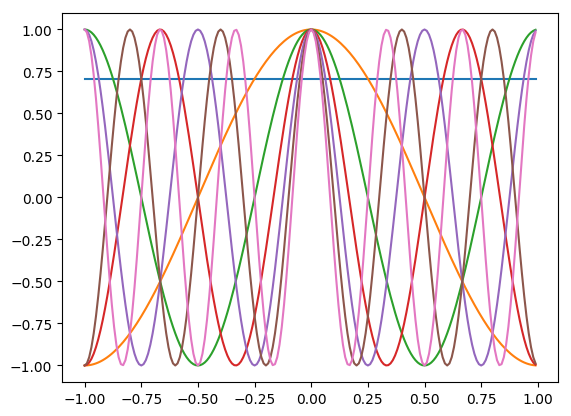

In [0]:
basis_cos=compute_cos_basis(t,T,10)

for i in range(7):
    plt.plot(t,basis_cos[i,:])

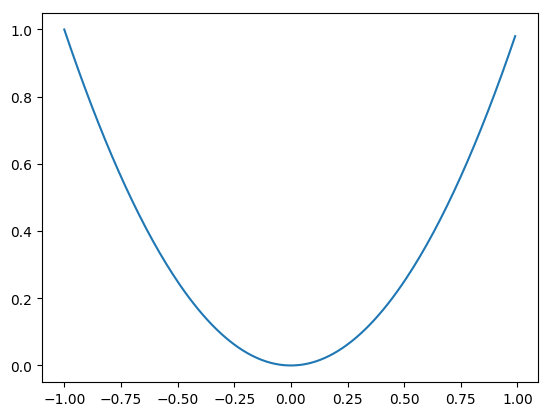

In [0]:
f_even=t**2
plt.plot(t,f_even);

In [0]:
decomposer=Decomposer(t,basis_cos,dot,f_even)

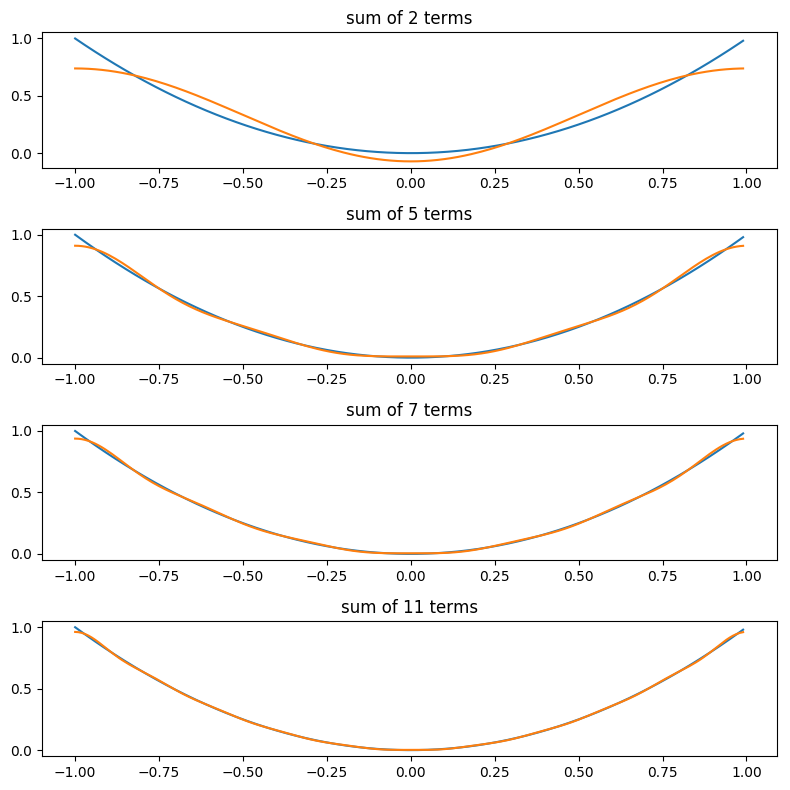

In [0]:
decomposer.compute_approximations([2,5,7,11],True);

This simple observation give us an idea to create a decomposition for signals defined on $[0,\frac T 2 ]$ with only cosinus. This decomposition is simpler, and often used in practice (ex: JPEG compression). 



***To you:*** $(2\heartsuit)$ Explain this idea, and explain why this only-cos decomposition is  less subjet to the Gipps phenomenum. 


***To you:*** $(4\heartsuit\flat)$ Make a program that compute the only-cos-decomposition of signals defined on $[0,\frac T 2 ]$. To not avoid useless computations, you need to modify the previous codes. Test your program with $f(t)=t$ defined on $[0,\frac T 2 ]$. Be careful, this is very short, but tricky. 




## Exponential decomposition


The sinCos decomposition is easy to understand because the basis function take real values. But for computations, a more pratical basis is the exponential family. 

### Theory in one theorem


We work now with signals that take complexe values. They are still defined on the time interval $[0,T]$. We need now an hermitian product:
$$
\forall f,g \qquad \mathtt{her}(f,g) = \frac 1 T \int_0^T f(t) \bar{g}(t) \, dt
$$
Where $\bar{g}(t)$ is the complexe-conjugate of $g(t)$. 


***To you:*** If you never met an hermitian-product before, no problem. It is just a little variant of a dot-product. Now we try to point out the difference (As usual, it is not necessary to make some research on internet):
* $(1\heartsuit)$ What replace the symetry?
* $(1\heartsuit)$ $g\to \mathtt{her}(f,g)$ is not exatly linear. Why?
*  $(1\heartsuit)$ Show that the third axiom of the dot product is still valid. 


We define the expontial family  $(e_n)_{n\in \mathbb Z}$ by:
$$
e_n(t) = e^{2i\pi \frac {nt} T }
$$
where $i=\sqrt{-1}$. 



***The 3 points theorem, exponential version***

* The familly $(e_n)_{n\in \mathbb Z}$ is orthonormal for the hermitian product $\mathtt{her}()$
* Complex-signals $f$ can be writed:
$$
f(t) = \sum_{n\in \mathbb Z} \alpha_n e_n(t)
$$
    * The sum converges for every $t$ where $f$ is continuous
    * morover, when $f$ is continuous and $f(0)=f(T)$ the convergence is uniform. 

* The coordinates $\alpha_n$ are easy to compute:
$$
\alpha_n= \mathtt{her}(f,e_n) 
$$


***Comments:*** 

* The first point is elementary (it is an exercise below)
* The second point is the difficult part. It means that  $(e_n)$ is a sort of basis for complex-signals.
* The expression of $\alpha_n$ comes from the orthonormality. 
* The coordinates $\alpha_n$ are called the 'exponentail Fourier coefficients'. Sometimes we denote them by $\alpha_n(f)$ or $\hat f(n)$ or $\mathcal F[f]_n$
* Be careful, $\mathtt{her}(e_n,f)$ would not give $\alpha_n$ but ... $(1\heartsuit)$.


***To you:*** 

* $(2\heartsuit)$ Check the orthonormality. You just need to know the primitive of the exponential. 
* $(2\heartsuit)$ From the orthonormality of the exponential family, deduce the orthonormality of the sinCos family. Help: use these facts:
    * $\mathtt{dot}(f,g)= 2 \, \mathtt{her}(f,g)$ when $f,g$ take real values. 
    * $\cos_n=\frac {e_n + e_{-n}} 2$
    * $\sin_n = \dots $
    

### complex numbers in python

In [0]:
(2+1j*4)*1j

(-4+2j)

In [0]:
np.exp(1j*np.pi)

(-1+1.2246467991473532e-16j)

***To you:*** $(1\heartsuit)$ Why is there a non-zero imaginary part in the number above?

### Practice

In [0]:
T=2
t=np.linspace(0,T,200,endpoint=False)

In [0]:
def compute_basis_exp(t,T,M): 

    basis=np.empty([2*M+1,nb_points],dtype=np.complex128)
    
    for n in range(-M,M+1):    
        basis[n+M,:]=np.exp(+2*1j*np.pi*n*t/T)
        
    return basis

In [0]:
M=5
N=2*M+1
basis_expo=compute_basis_exp(t,T,M)
basis_expo.shape,basis_expo.dtype

((11, 200), dtype('complex128'))

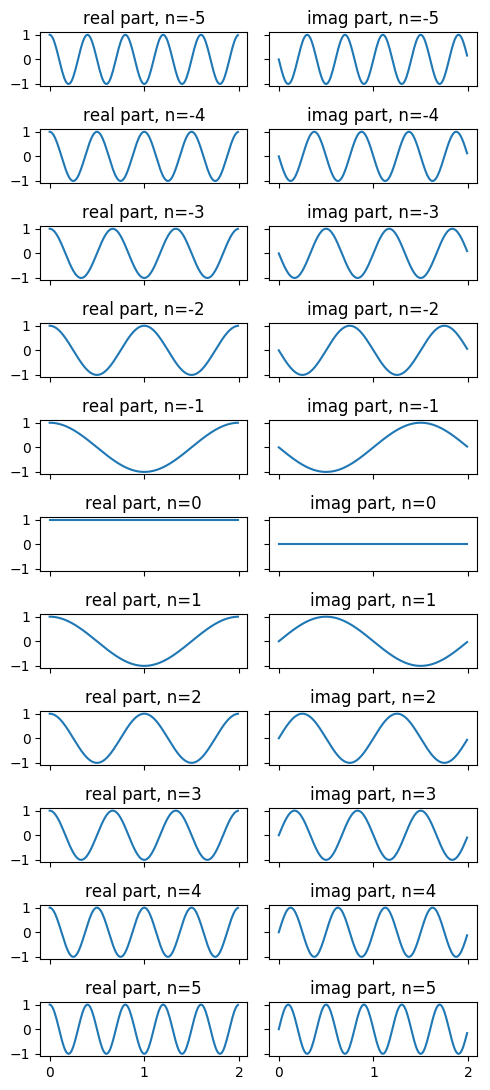

In [0]:
fig,axs=plt.subplots(N,2,figsize=(5,N),sharex=True,sharey=True)

for n in range(-M,M+1):
    i=M+n
    axs[i,0].plot(t,np.real(basis_expo[i,:]))
    axs[i,1].plot(t,np.imag(basis_expo[i,:]))
    axs[i,0].set_title("real part, n=%d"%n)
    axs[i,1].set_title("imag part, n=%d"%n)
    
fig.tight_layout()

In [0]:
def her(f,g):
    return np.sum(f*np.conj(g))/len(f)

In [0]:
f=t*(2-t)**2+1
decomposer_expo=Decomposer(t,basis_expo,her,f)
decomposer_expo.dtype=np.complex128

In [0]:
decomposer_expo.check_ortho(5)

[[ 1.+0.j  0.+0.j  0.-0.j  0.+0.j -0.-0.j]
 [ 0.+0.j  1.+0.j  0.+0.j -0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j -0.+0.j -0.+0.j]
 [ 0.-0.j -0.+0.j -0.+0.j  1.+0.j -0.-0.j]
 [-0.+0.j  0.-0.j -0.-0.j -0.+0.j  1.+0.j]]


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


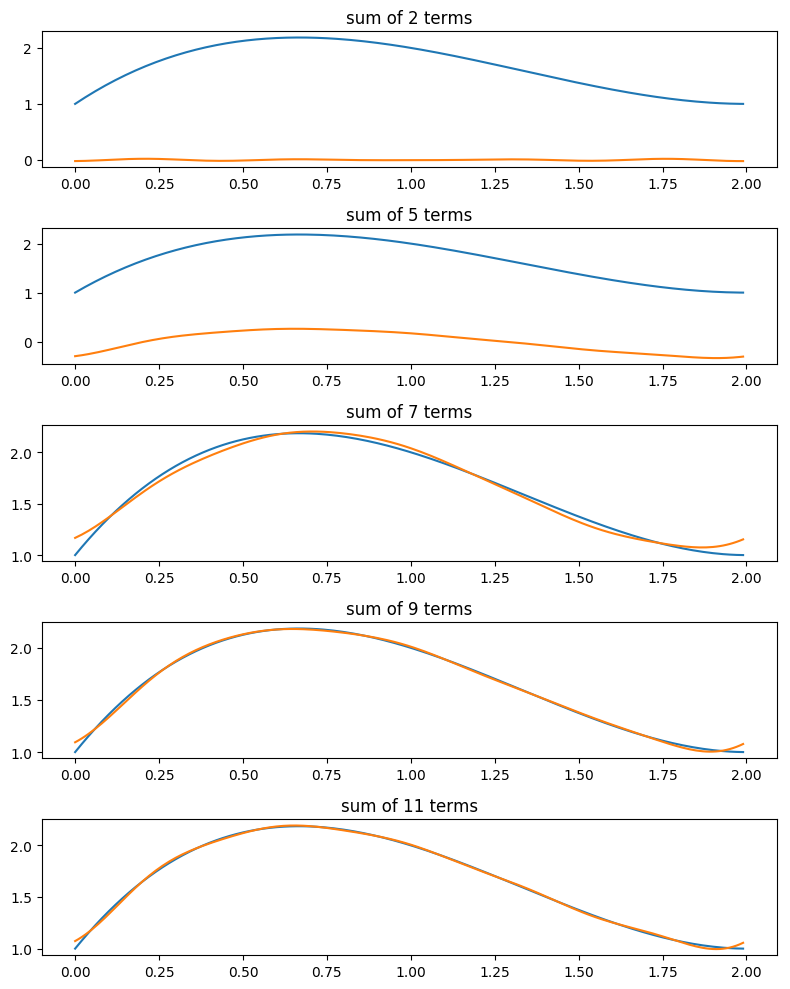

In [0]:
decomposer_expo.compute_approximations([2,5,7,9,11],True);

***To you:*** 

* $(2\heartsuit)$ Can you explain why the orange curve is so far from the blue one in the first approximations? Help: read the next question.
* $(1\heartsuit)$ Imagine a better ordering of the basis to avoid this problem. Bonus: you can code it, and restart the `Decomposer` with you re-ordered basis.

### Change of coordinates


Every real signal $f$ can be writen in two differents ways: as combinaison of $(\frac 1 {\sqrt 2},\cos_n,\sin_n)$ or as a combinaison of $(e_n)$. 


To pass from one to the other decomposition, we can compute some change of coordinates: 
$$
\alpha_n =\mathtt {her} (f,e_n) = \mathtt {her} (f,cos_n+i \sin_n) = ... 
$$

***To you:*** $(1\heartsuit)$ Complete the computation. Becarefull when you put the $i$ out of the hermitian product. 


***To you:*** $(1\heartsuit)$  Under which condition on $f$ the exponential-Fourier coefficients are real. 



### Hermitian symetry


***To you:*** Prove that, when $f$ is a real signal, their complex Fourier coefficients satisfy $\alpha_{-n}=\overline{\alpha_n}$




In [0]:
alpha=decomposer_expo.OUT_coordinates
print(alpha)

[-0.008+0.002j -0.013+0.003j -0.023+0.007j -0.051+0.024j -0.203+0.194j  1.667+0.j    -0.203-0.194j -0.051-0.024j -0.023-0.007j -0.013-0.003j -0.008-0.002j]


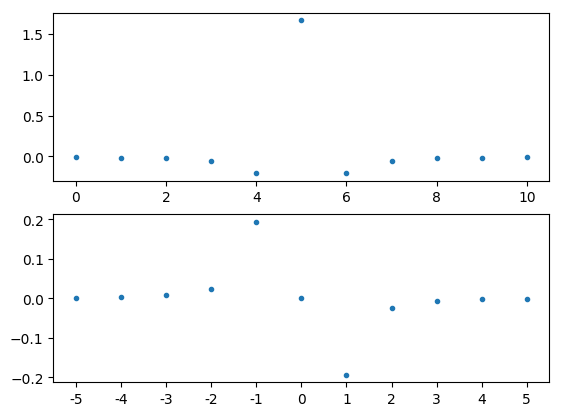

In [0]:
fig,axs=plt.subplots(2,1)
axs[0].plot(np.real(alpha),'.')
axs[1].plot(np.imag(alpha),'.');
axs[1].set_xticks(range(0,N))
axs[1].set_xticklabels(range(-M,M+1));

### Spectrum

Here we just give some important vocabulary. 


* The spectrum is simply the family of Fourier coefficients (=coordinates):
$
\mathtt{spectrum}=(\alpha_n)_{n\in \mathbb Z}
$
* The amplitude spectrum is the module of the spectrum:
$
\mathtt{amplitude\_spectrum}=( |\alpha_n|)_{n\in \mathbb Z}
$
* When the signal is real, because of the hermitian symetry, we often consider only the half spectrums:
$
\mathtt{half\_spectrum}=(\alpha_n)_{n\in \mathbb N}
$
* And is amplitude version:
$
\mathtt{half\_amplitude\_spectrum}=(\alpha_n)_{n\in \mathbb N}
$
* Because we work with a limited computer (what a pity), we only plot part of the spectrums, which are acutally the spectrums of the approximations of the signals:
$
\mathtt{truncated\_spectrum}=(\alpha_n)_{|n|\leq M}
$

***To you:*** $(2\heartsuit)$ Plot the truncated version of the half-amplitude-spectrum of our signal. Help: modify the previous code. 


## Exo: Signal filtering

The two main applications of signals decompostion are:

* Signal filtering: Every signal can be decompose into a sum of elementary waves (ex: sinCos) with given frequency. To filter a signal is to keep only a part of these waves:
    * Low-pass filters suppress all waves with high frequencies
    * High-pass filters suppress all waves with low frequencies
    * Band-pass filters suppress all waves whose frequencies does not belong to a given band, ex: [50Hz,2000Hz]
    
* Signal compression: Actually it is the same as filtering: we keep only waves that are visible, and suppress others to compress.



In [0]:
"""Here is a noisy signal"""
f_noisy=np.loadtxt("assets_signal/signalToFilter.txt")

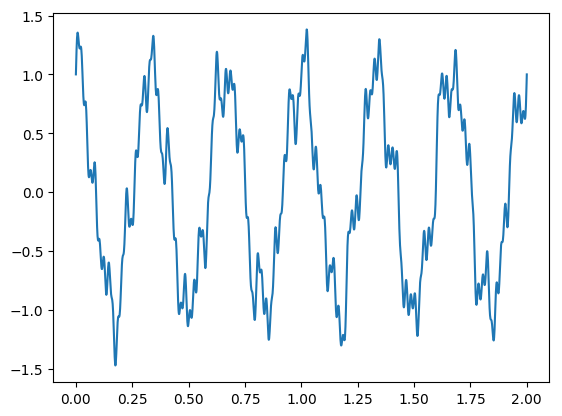

In [0]:
"""Its duration is 2 seconds"""
T=2
t=np.linspace(0,T,2000)
plt.plot(t,f_noisy);

***To you:*** In this exercise, I ask you to not use the `Decomposer`. To write all formulas explicitly will help you to remember them. It is even beter to not use copy-past at all.

* $(3\heartsuit)$ Decompose the noisy signal in the sinCos basis. Be careful, this signal has some high frequencies (=noise).
* $(2\heartsuit)$ Make a nice plot of the half-amplitude-spectrum (truncated of course). 
* $(4\heartsuit)$ Suppress the noise of this signal, keeping only one frequency. Plot this denoised signal, plot it togeter with its spectrum. Help: to make nice plot you can plot on the same window the signal dans its approximation. You can also put the original spectrum and the filtrered spectrum one over the other. 

## Perfect sampling

### We were perfect!

Perhaps something seemed you strange in all the previous code: Everywhere we have approximate the integrals by the rectangle method (a non-so-good method), but however, our basis function were perfectly orthogonal: the dot-products were exactly $0$ or $1$!

Observe the following code to see the trick.


In [0]:
T=2

In [0]:
t_perfect=np.linspace(0,T,100,endpoint=False)
f_perfect=(t_perfect-1)**2
print(t_perfect)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96
 1.98]


In [0]:
basis_sc_perfect=compute_sinCos_basis(t_perfect,T,5)

In [0]:
decomposer_perfect=Decomposer(t_perfect,basis_sc_perfect,dot,f_perfect)
decomposer_perfect.check_ortho()

[[ 1. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.]
 [-0.  1.  0. -0.  0. -0.  0. -0. -0. -0.  0.]
 [-0.  0.  1.  0.  0.  0.  0. -0.  0.  0. -0.]
 [ 0. -0.  0.  1. -0. -0. -0. -0.  0. -0. -0.]
 [-0.  0.  0. -0.  1. -0.  0.  0. -0. -0.  0.]
 [ 0. -0.  0. -0. -0.  1.  0. -0. -0.  0. -0.]
 [-0.  0.  0. -0.  0.  0.  1. -0.  0. -0. -0.]
 [-0. -0. -0. -0.  0. -0. -0.  1. -0.  0.  0.]
 [-0. -0.  0.  0. -0. -0.  0. -0.  1.  0. -0.]
 [-0. -0.  0. -0. -0.  0. -0.  0.  0.  1. -0.]
 [-0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  1.]]


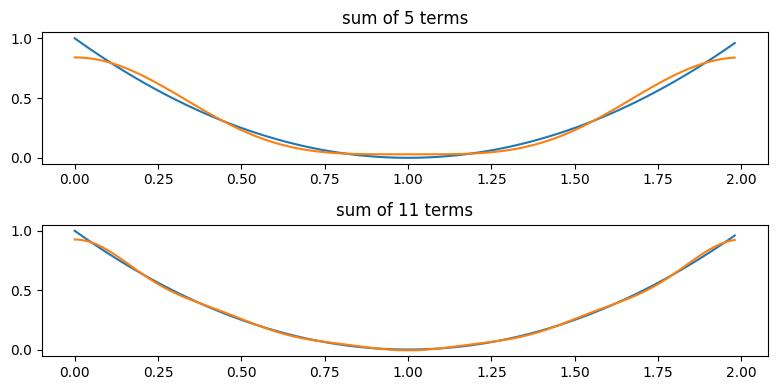

In [0]:
decomposer_perfect.compute_approximations([5,11],True);

In [0]:
t_bad=np.linspace(0,T,100) #endpoint=True by default
f_bad=(t_bad-1)**2
print(t_bad)

[0.    0.02  0.04  0.061 0.081 0.101 0.121 0.141 0.162 0.182 0.202 0.222 0.242 0.263 0.283 0.303 0.323 0.343 0.364 0.384 0.404 0.424 0.444 0.465 0.485 0.505 0.525 0.545 0.566 0.586 0.606 0.626 0.646 0.667 0.687 0.707 0.727 0.747 0.768 0.788 0.808 0.828 0.848 0.869 0.889 0.909 0.929 0.949 0.97  0.99  1.01  1.03  1.051 1.071 1.091 1.111 1.131 1.152 1.172 1.192 1.212 1.232 1.253 1.273 1.293 1.313 1.333 1.354 1.374 1.394 1.414 1.434 1.455 1.475 1.495 1.515 1.535 1.556 1.576 1.596 1.616 1.636 1.657
 1.677 1.697 1.717 1.737 1.758 1.778 1.798 1.818 1.838 1.859 1.879 1.899 1.919 1.939 1.96  1.98  2.   ]


In [0]:
basis_sc_bad=compute_sinCos_basis(t_bad,T,5)

In [0]:
decomposer_bad=Decomposer(t_bad,basis_sc_bad,dot,f_bad)
decomposer_bad.check_ortho()

[[ 1.    -0.     0.014 -0.     0.014  0.     0.014 -0.     0.014 -0.     0.014]
 [-0.     0.99  -0.    -0.    -0.    -0.    -0.     0.    -0.     0.    -0.   ]
 [ 0.014 -0.     1.01  -0.     0.02  -0.     0.02  -0.     0.02   0.     0.02 ]
 [-0.    -0.    -0.     0.99  -0.     0.    -0.     0.     0.    -0.    -0.   ]
 [ 0.014 -0.     0.02  -0.     1.01  -0.     0.02  -0.     0.02  -0.     0.02 ]
 [ 0.    -0.    -0.     0.    -0.     0.99  -0.    -0.    -0.     0.    -0.   ]
 [ 0.014 -0.     0.02  -0.     0.02  -0.     1.01  -0.     0.02  -0.     0.02 ]
 [-0.     0.    -0.     0.    -0.    -0.    -0.     0.99  -0.     0.    -0.   ]
 [ 0.014 -0.     0.02   0.     0.02  -0.     0.02  -0.     1.01  -0.     0.02 ]
 [-0.     0.     0.    -0.    -0.     0.    -0.     0.    -0.     0.99  -0.   ]
 [ 0.014 -0.     0.02  -0.     0.02  -0.     0.02  -0.     0.02  -0.     1.01 ]]


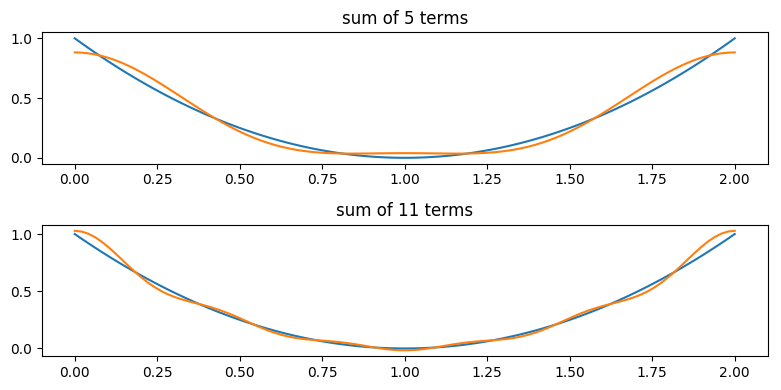

In [0]:
decomposer_bad.compute_approximations([5,11],True);

Explanation: To be perfect: you must discretize $[0,T]$ regularly but without adding the point $T$!. It is quite intuivive: When you prolongate periodically the functions, the point $T$ is equivalent to the point $0$, so it is better to not add it as a discretisation point. 

When you make the perfect discretization,  the elements of the sinCos family becomes vectors that are exactly orthogonals according to the discrete dot-product which is:
$$
\mathtt{dot_{dis}}(f,g) =\frac 1N \sum_{n} f(x_n) g(x_n)
$$
where $x_n$ are the discretisation points. 


To work directly with orthogonals vectors, and not with continuous-time functions, is the basic principle of the discrete Fourier decomposition that we will see in the next chapter. 

When you use an non-perfect discretization, the sinCos becomes only almots-orthogonal, and the approximations are worse. 

### Orthogonal polynomials $\flat$

We finish by an example, that show that there are others orthogonal basis with respect to the same dot-product: Legendre polynomials are often use in numerical analysis to make numerical integration: the idea is to approach function by polynomial (as we did with sinCos), and then to compute the integral exactly (because it is easy to extract the primitive of a polynomial). 

But we will see is really more complicated to get a perfect discretisation of the Legendre basis.


***Definition:*** Legendre polynomials are defined on $[-1,+1]$ recursivly by:
\begin{align*}
n P_n(x)&=  (2n-1) x P_{n-1}(x)- (n-1) P_{n-2}(x)\\
P_0&=1\\
P_1&=x
\end{align*}

They are orthogonal with respect to the dot-product:
$$
\mathtt{dot} (f,g) = \int_{-1}^{+1} f(x)g(x) \, dx
$$


To make a perfect discretization of $(P_0,...,P_n)$, we need to consider some special points: the Gauss-points which are the roots of $P_{n+1}$. Let us denote by$(x_0,...,x_n)$ these points. The discrtised family $(P_0,...,P_n)$ is then orthogonal with respect to the discrete weighted dot-product:
$$
\mathtt{dot_{dis}} (f,g) = \sum_{i=0}^n w_i f(x_i) g(x_i)
$$
where $w_i$ are some weights.



discrétisation: [-0.999 -0.994 -0.985 -0.973 -0.957 -0.937 -0.913 -0.886 -0.855 -0.822 -0.785 -0.744 -0.702 -0.656 -0.608 -0.557 -0.504 -0.45  -0.393 -0.336 -0.276 -0.216 -0.155 -0.093 -0.031  0.031  0.093  0.155  0.216  0.276  0.336  0.393  0.45   0.504  0.557  0.608  0.656  0.702  0.744  0.785  0.822  0.855  0.886  0.913  0.937  0.957  0.973  0.985  0.994  0.999]


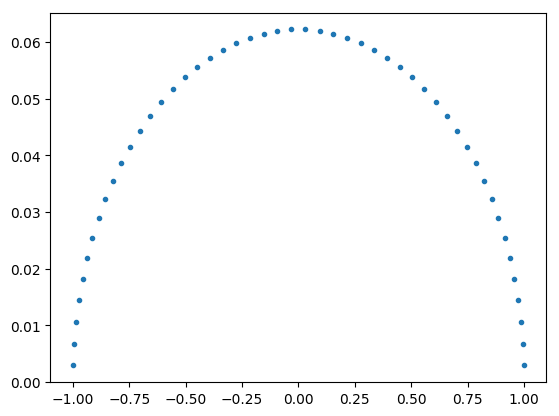

In [0]:
import scipy.special as spe

degreeMax=19
''' the working interval is [-1,1], we cut it into nbStep points'''
nbStep=50
""" The Gauss point, and their associated weights"""
x, w, _ = spe.roots_legendre(nbStep, True)
print("discrétisation:",x)

plt.plot(x, w, '.');

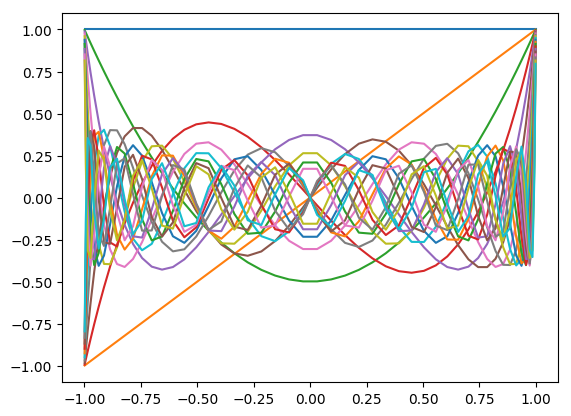

In [0]:
"""
We create legendre polynomial from the recursive formula
"""
basis = np.zeros([degreeMax+1, nbStep])
basis[0, :] = 1.
basis[1, :] = x
for n in range(2, degreeMax+1):
    basis[n, :] = ((2 * n - 1) * x * basis[n - 1, :] - (n - 1) * basis[n - 2, :]) / n

for i in range(len(basis)):
    plt.plot(x,basis[i,:])

Note that, in the following code, we do not define a function `dot()`. Dot products are directly computed using the matrix multiplication `@`

In [0]:
""" weights are put on the diagonal of a matrix"""
W=np.diag(w)
sca= basis @ W @ basis.T
"""The Legendre family is orthogonal but not orthonormal"""
print(basis @ W @ basis.T)

[[ 2.    -0.    -0.     0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.    -0.    -0.    -0.     0.    -0.     0.    -0.    -0.   ]
 [-0.     0.667  0.    -0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.   ]
 [-0.    -0.     0.4    0.    -0.     0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.   ]
 [ 0.    -0.     0.     0.286 -0.    -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.     0.    -0.    -0.    -0.    -0.    -0.   ]
 [-0.     0.    -0.    -0.     0.222 -0.    -0.    -0.    -0.     0.    -0.     0.    -0.    -0.    -0.    -0.    -0.     0.    -0.    -0.   ]
 [ 0.    -0.     0.    -0.     0.     0.182  0.    -0.    -0.    -0.     0.    -0.    -0.    -0.     0.    -0.     0.    -0.     0.    -0.   ]
 [-0.     0.    -0.    -0.    -0.    -0.     0.154  0.    -0.     0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.    -0.     0.   ]

In [0]:
"""We normalize the family"""
basisNor=np.zeros([degreeMax+1,nbStep])
for i in range(degreeMax+1):
    basisNor[i,:]=basis[i,:]/np.sqrt(sca[i,i])
    
print(basisNor @ W @ basisNor.T )

[[ 1. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
 [-0.  1. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0.  0.  1.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0.]
 [-0. -0. -0.  1.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0.  1. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.]
 [-0. -0. -0. -0. -0.  1. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  1. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.]
 [-0. -0.  0. -0. -0. -0. -0.  1. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.  0. -0. -0.  1. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.]
 [-0. -0.  0. -0.  0. -0.  0. -0. -0.  1. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0.]
 [-0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  1. -0. -0. -0. -0. -0. -0. -0. -0.  0.]
 [ 0. -0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  1.  0. -0. -0. -0.  0. -0.  0. -0.]
 [-0

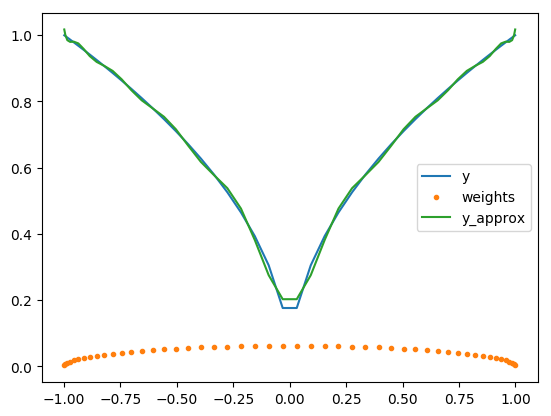

In [0]:
""" A function to approximate """
y = np.sqrt(np.abs(x))
""" y_coor[i] =  sca( y[:] , basis[i,:] ) """
y_coor=   basisNor @ W @ y
""" y_approx is a linear combinaison of elements of the basis   """
y_approx= y_coor @ basisNor

plt.plot(x,y,label="y")
plt.plot(x, w, '.',label="weights")
plt.plot(x,y_approx,label="y_approx")
plt.legend();

Note that it is normal that the graph of $t\to|t|$ is flat at $0$, because of the discretization. 


***To you:*** Observe what it occurs when:

* 1/ The function to approximate is a polynomial. Ex: `f=x**2+x`
* 2/ The number of element of the basis is equal to the number of discretisation points. Ex: `degreeMax=19` and `nbStep=20`. 



## Hilbertian theory

Here is a more theoretical part. But howerver, very simple (trust me). 

### Hilbertian basis


If you consider that signal are square integrable function on $[0,T]$, then the sinCos-wave-basis or exponential-wave-basis are Hilbertian basis, which means that the approximations converge in $L_2$ norm. 





* Denote by $L_2([0,T]\to \mathbb C)$ the set of functions from $[0,T]$ to $\mathbb C$ which are square integrable. For every $f$ in this space:
$$
\| \sum_{n=-M}^M \mathtt{her}(f,e_n)\, e_n   -   f  \| \to 0
$$
with $\|g\|^2=\mathtt{her}(g,g)$.


* Denote by $L_2([0,T]\to \mathbb R)$ the set of functions from $[0,T]$ to $\mathbb R$ which are square integrable. For every $f$ in this space:
$$
\| \sum_{n=0}^N \mathtt{dot}(f,sc_n)\, sc_n   -   f  \| \to 0
$$
with $\|g\|^2=\mathtt{dot}(g,g)$.

* Actually, the second point above is also true for function $f \in L_2([0,T]\to \mathbb C)$: you just have to add a conjugaison in the dot-product to change it on an hermitian product: $\mathtt{dot}(f,g)= \frac 2T \int_0^T f \bar g$.

### Fourier transform as an isometry



Let us change  notations  for Fourier coefficients:
* $\mathcal F_{sc}[f]_n =\mathtt{dot}(f,sc_n)$ 
* $\mathcal F_{e}[f]_n = \mathtt{her}(f,e_n)$


It is interesant to considere the applications that, to a function, associate the Fourier coefs (=the spectrum). 

* $f\to \mathcal F_{sc}[f]$ is a bijection from $L_2([0,T]\to \mathbb R)$ to $\ell_2(\mathbb N \to \mathbb R)$
* $f\to \mathcal F_{e}[f]$ is a bijection from $L_2([0,T]\to \mathbb C)$ to $\ell_2(\mathbb Z \to \mathbb C)$ 

But also:
* $f\to \mathcal F_{e}[f]$ is a bijection from $L_2([0,T]\to \mathbb R)$ to the set of the elements of $\ell_2(\mathbb Z \to \mathbb C)$  which have the hermitian properties. 



And we have these Plancherel-Parseval identities:
$$
\mathtt{dot}(f,g) = \sum_{n\in \mathbb N} \mathcal F_{sc}[f]_n \,  \mathcal F_{sc}[f]_n 
$$
$$
\mathtt{her}(f,g) = \sum_{n\in \mathbb Z} \mathcal F_{e}[f]_n \,  \mathcal F_{e}[g]_n  
$$
which indicates that both $\mathcal  F$ are $L_2$-isometries.

***To you:*** 
* $(1\heartsuit)$ Correct the small mistake in one of the equation above.
*  $(2\heartsuit)$ Prove them. Help: it is just a consquence of the orthonormality. To be rigourous, you must also invocate the continuity of the dot and hermitian products.

***To you:*** Considere an approximation $f_{fitred}$ of the signal $f$ make by suppressing some term in the sinCos-Fourier serie. Ex:

* You keep only cosinus
* You keep only sinus
* You keep only low frequencies waves
* You keep only high frequencies waves
* You suppress the constant term
* etc.

How can you define $f_{fitred}$ in term of projection $(2\heartsuit)$?



### Energy of a signal


The enercy of a signal $f$ si define by
$$
E=\int_0^T |f'(t)|^2\, dt
$$
(but it depends on the context: they define the energy without the derivation)



***To you:*** 
* Which is the energy of a wave $e_n$?
* Does a low-pitched sound (grave) is more energetic than  an high-piched sound (=aigu)?
* Try to express the energy directly in term of exponential-Fourier-coefficients (a similar formula exists for sinCos-Fourier-coef of course).




***Remark:*** In most of signal books,  the ernergy is simply defined as $\int_0^T |f(t)|^2\, dt$ (no derivation). But it depends of the physical meaning of $f$. Ex: if it is a pressure:  with constant pressure, you cannot produce energy at all, so the energy formula must incorporate the derivation of the signal. 

